**import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing all the libraries needed in this notebook
# import math
# import warnings
# import numpy as np 
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import seaborn as sns
# import plotly.offline as py
# import plotly.graph_objs as go
# import matplotlib.pyplot as plt
# warnings.filterwarnings('ignore')
!py -m pip install folium

In [2]:
terrorism = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
terrorism.head(10)

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   
5  197001010002   1970       1     1        NaN         0        NaN      217   
6  197001020001   1970       1     2        NaN         0        NaN      218   
7  197001020002   1970       1     2        NaN         0        NaN      217   
8  197001020003   1970       1     2        NaN         0        NaN      217   
9  197001030001   1970       1     3        NaN         0        NaN      217   

          country_txt  region  ...  \
0  Dominican Republic       2  ...   
1              Mexico       1  ...   
2         Philippines       5  ...   
3              Greece       8  ...   
4               Japan       4  ...   
5       United States       1  ...   
6             Uruguay       3  ...   
7       United States       1  ...   
8       United States       1  ...   
9       United States       1  ...   

                                            addnotes  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5  The Cairo Chief of Police, William Petersen, r...   
6                                                NaN   
7  Damages were estimated to be between $20,000-$...   
8  The New Years Gang issue a communiqué to a loc...   
9  Karl Armstrong's girlfriend, Lynn Schultz, dro...   

                                              scite1  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5  "Police Chief Quits," Washington Post, January...   
6                                                NaN   
7  Committee on Government Operations United Stat...   
8  Tom Bates, "Rads: The 1970 Bombing of the Army...   
9  Committee on Government Operations United Stat...   

                                              scite2  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5  "Cairo Police Chief Quits; Decries Local 'Mili...   
6                                                NaN   
7  Christopher Hewitt, "Political Violence and Te...   
8  David Newman, Sandra Sutherland, and Jon Stewa...   
9  Tom Bates, "Rads: The 1970 Bombing of the Army...   

                                              scite3        dbsource  INT_LOG  \
0                                                NaN            PGIS        0   
1                                                NaN            PGIS        0   
2                                                NaN            PGIS       -9   
3                                                NaN            PGIS       -9   
4                                                NaN            PGIS       -9   
5  Christopher Hewitt, "Political Violence and Te...  Hewitt Project       -9   
6                                                NaN            PGIS        0   
7                                                NaN  Hewitt Project       -9   
8  The Wisconsin Cartographers' Guild, "Wisconsin...  Hewitt Project        0   
9  David Newman, Sandra Sutherland, 

In [3]:
terrorism.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Rename the columns 

In [4]:
terrorism.rename(columns = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

Drop the irrelevant columns 

In [5]:
terrorism = terrorism[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [6]:
terrorism.head()

Year  Month  Day             Country    state                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     NaN      NaN             U.S. Embassy     NaN   
4     NaN      NaN           U.S. Consulate     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  
0     Unknown    NaN  
1     Unknown    NaN  
2     Unknown    NaN  
3  Explosives    NaN  
4  Incendiary    NaN

In [7]:
terrorism.describe()

Year          Month            Day       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean     2002.638997       6.467277      15.505644      23.498343   
std        13.259430       3.388303       8.814045      18.569242   
min      1970.000000       0.000000       0.000000     -53.154613   
25%      1991.000000       4.000000       8.000000      11.510046   
50%      2009.000000       6.000000      15.000000      31.467463   
75%      2014.000000       9.000000      23.000000      34.685087   
max      2017.000000      12.000000      31.000000      74.633553   

          longitude         Killed        Wounded  
count  1.771340e+05  171378.000000  165380.000000  
mean  -4.586957e+02       2.403272       3.167668  
std    2.047790e+05      11.545741      35.949392  
min   -8.618590e+07       0.000000       0.000000  
25%    4.545640e+00       0.000000       0.000000  
50%    4.324651e+01       0.000000       0.000000  
75%    6.871033e+01       2.000000       2.000000  
max    1.793667e+02    1570.000000    8191.000000

In [8]:
terrorism.corr()

Year     Month       Day  latitude  longitude    Killed  \
Year       1.000000  0.000139  0.018254  0.166933   0.003917  0.015341   
Month      0.000139  1.000000  0.005497 -0.015978  -0.003880  0.003463   
Day        0.018254  0.005497  1.000000  0.003423  -0.002285 -0.003693   
latitude   0.166933 -0.015978  0.003423  1.000000   0.001463 -0.018124   
longitude  0.003917 -0.003880 -0.002285  0.001463   1.000000 -0.000562   
Killed     0.015341  0.003463 -0.003693 -0.018124  -0.000562  1.000000   
Wounded    0.015273  0.002938 -0.001268  0.015988   0.000223  0.534375   

            Wounded  
Year       0.015273  
Month      0.002938  
Day       -0.001268  
latitude   0.015988  
longitude  0.000223  
Killed     0.534375  
Wounded    1.000000

In [9]:
terrorism.cov()

Year        Month          Day     latitude     longitude  \
Year         175.812496     0.006242     2.133346    40.951530  1.059590e+04   
Month          0.006242    11.480600     0.164158    -1.005279 -2.692110e+03   
Day            2.133346     0.164158    77.687385     0.559877 -4.120870e+03   
latitude      40.951530    -1.005279     0.559877   344.816764  5.564253e+03   
longitude  10595.897714 -2692.109846 -4120.870170  5564.252921  4.193443e+10   
Killed         2.292652     0.135442    -0.375477    -3.822593 -1.358855e+03   
Wounded        7.019333     0.357870    -0.401569    10.634340  1.740424e+03   

                Killed      Wounded  
Year          2.292652     7.019333  
Month         0.135442     0.357870  
Day          -0.375477    -0.401569  
latitude     -3.822593    10.634340  
longitude -1358.855169  1740.424297  
Killed      133.304125   188.711482  
Wounded     188.711482  1292.358771

Find out the null values

In [10]:
terrorism.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

Get the information about dataset

In [11]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

# Exploratory Data Analysis

**Destructive Feature of data**

In [12]:
terrorism.head(2)

Year  Month  Day             Country    state                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   

            city   latitude  longitude                   AttackType  Killed  \
0  Santo Domingo  18.456792 -69.951164                Assassination     1.0   
1    Mexico city  19.371887 -99.086624  Hostage Taking (Kidnapping)     0.0   

   Wounded                   Target Summary  \
0      0.0             Julio Guzman     NaN   
1      0.0  Nadine Chaval, daughter     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   

  Weapon_type Motive  
0     Unknown    NaN  
1     Unknown    NaN

In [13]:
print('Country with the most attacks:', terrorism['Country'].value_counts().idxmax())
print('City with the most attacks:', terrorism['city'].value_counts().index[1])
print('Region with the most attacks:', terrorism['Region'].value_counts().idxmax())
print('Year with the most attacks:', terrorism['Year'].value_counts().idxmax())
print('Month with the most attacks:', terrorism['Month'].value_counts().idxmax())
print('Group with the most attacks:', terrorism['Group'].value_counts().index[1])
print('Most Attack Type:', terrorism['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Type: Bombing/Explosion


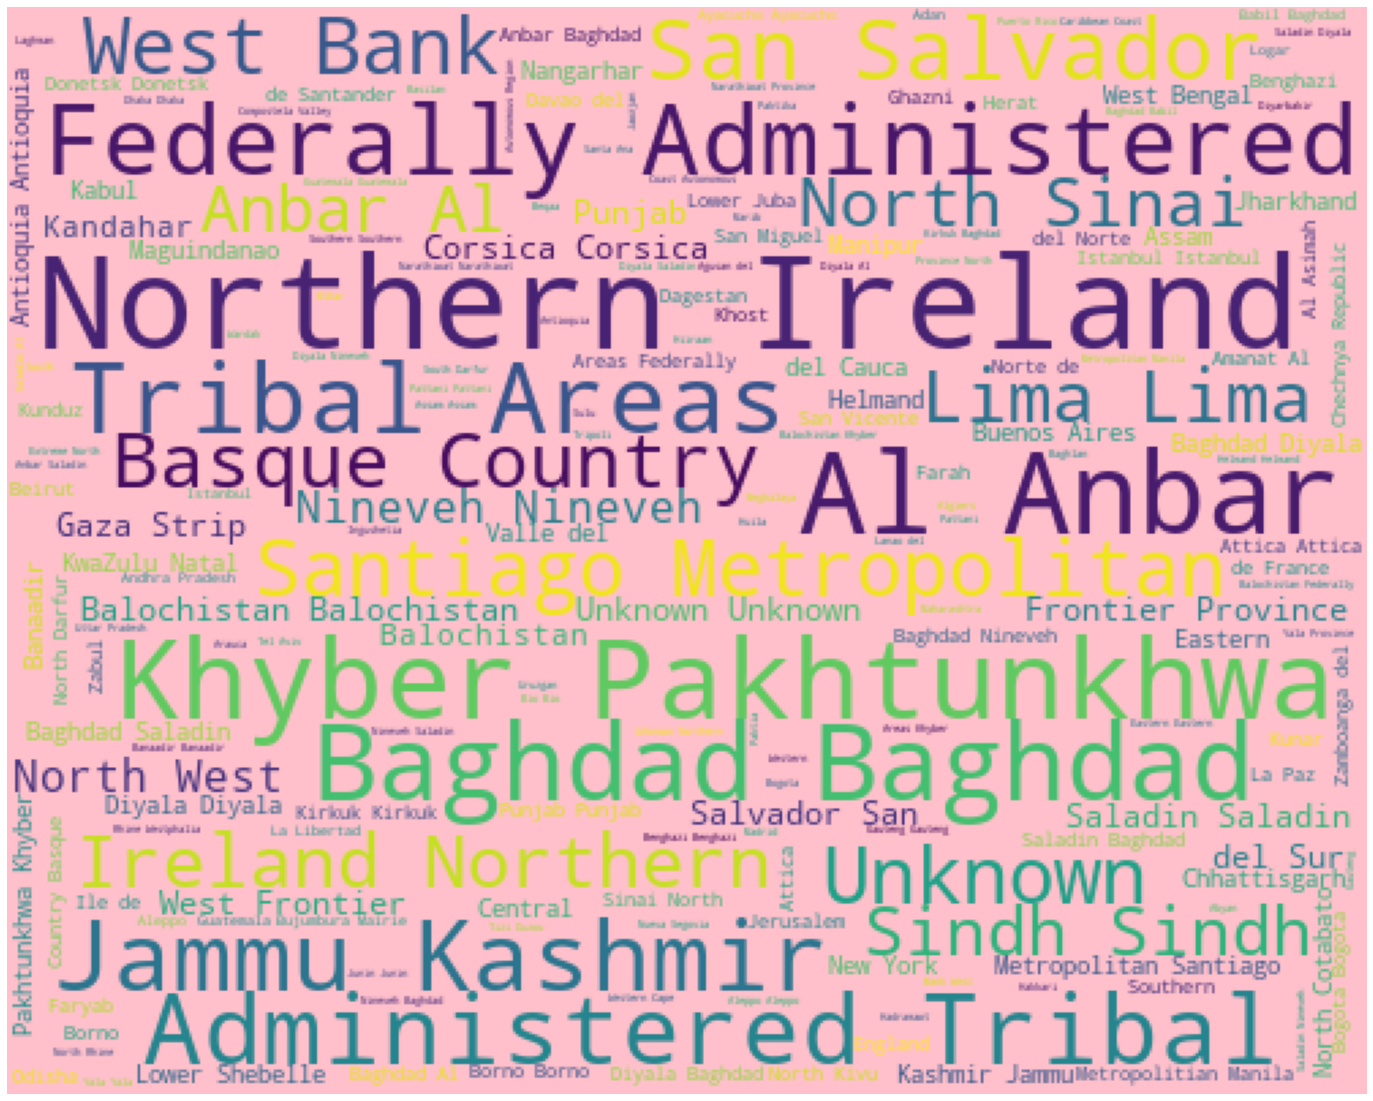

In [14]:
from wordcloud import WordCloud
from scipy import signal
cities = terrorism.state.dropna(False)
plt.subplots(figsize=(25,20))
wordcloud = WordCloud(background_color = 'pink', width = 500, height = 400).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [15]:
terrorism['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

**Terrorist Activities Each Year**

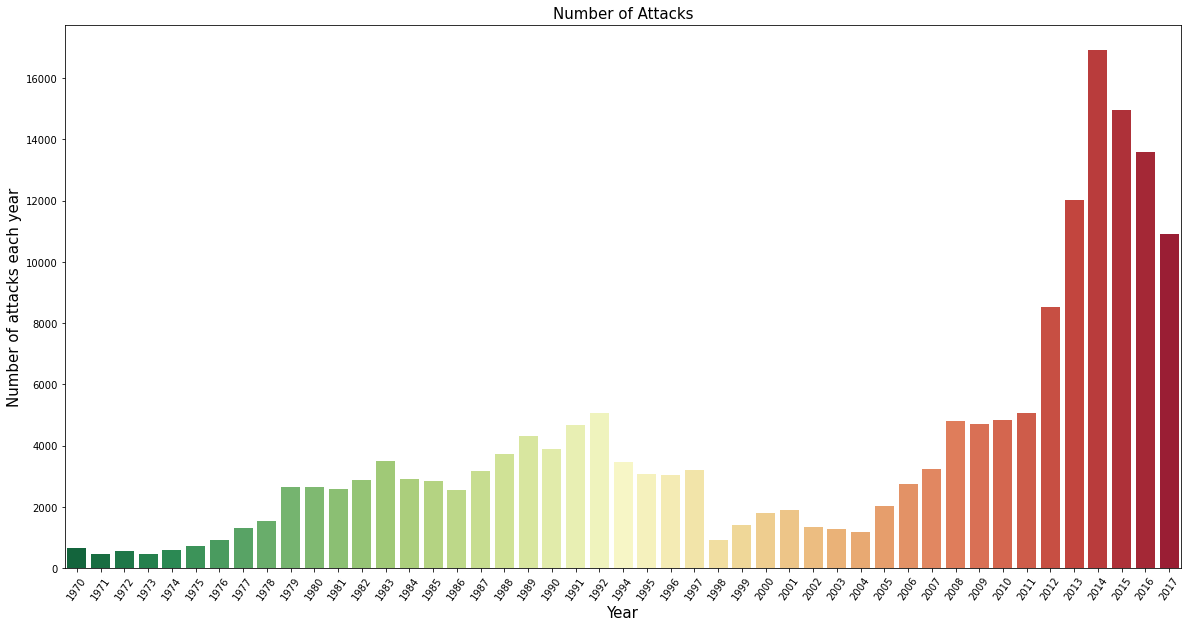

In [16]:
plt.figure(figsize=(20,10))
year = terrorism['Year'].unique()
count_year = terrorism['Year'].value_counts(dropna=False).sort_index()
sns.barplot(year, count_year, data=terrorism, palette='RdYlGn_r')
plt.title('Number of Attacks', fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of attacks each year',fontsize=15)
plt.xticks(rotation=55)
plt.show()

# Terrorist Activities By Region In Each Year

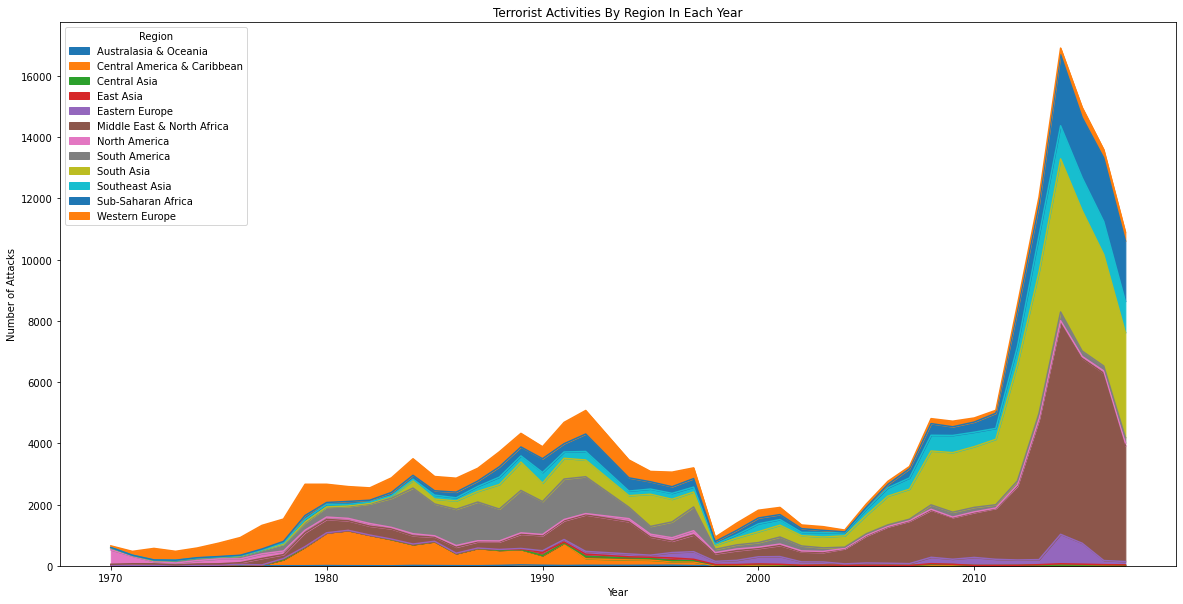

In [17]:
pd.crosstab(terrorism.Year, terrorism.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [18]:
terrorism['Country'].value_counts()[:20]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

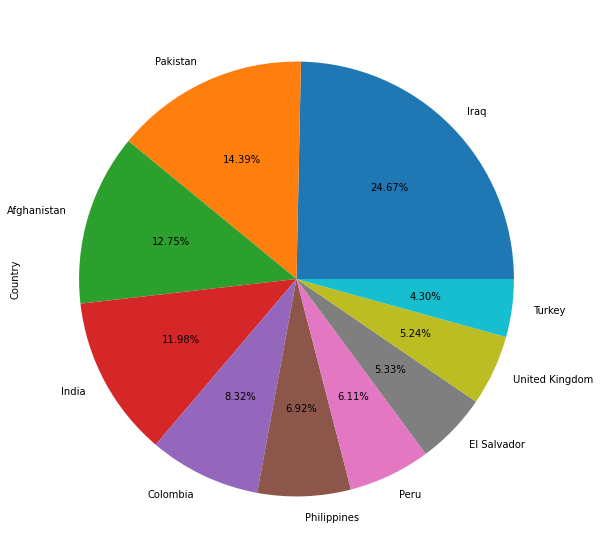

In [19]:
plt.figure(figsize=(16,10))
terrorism['Country'].value_counts()[:10].plot.pie(autopct='%.2f%%')
plt.show()

# Top Countries Affected By Terrorist Attacks

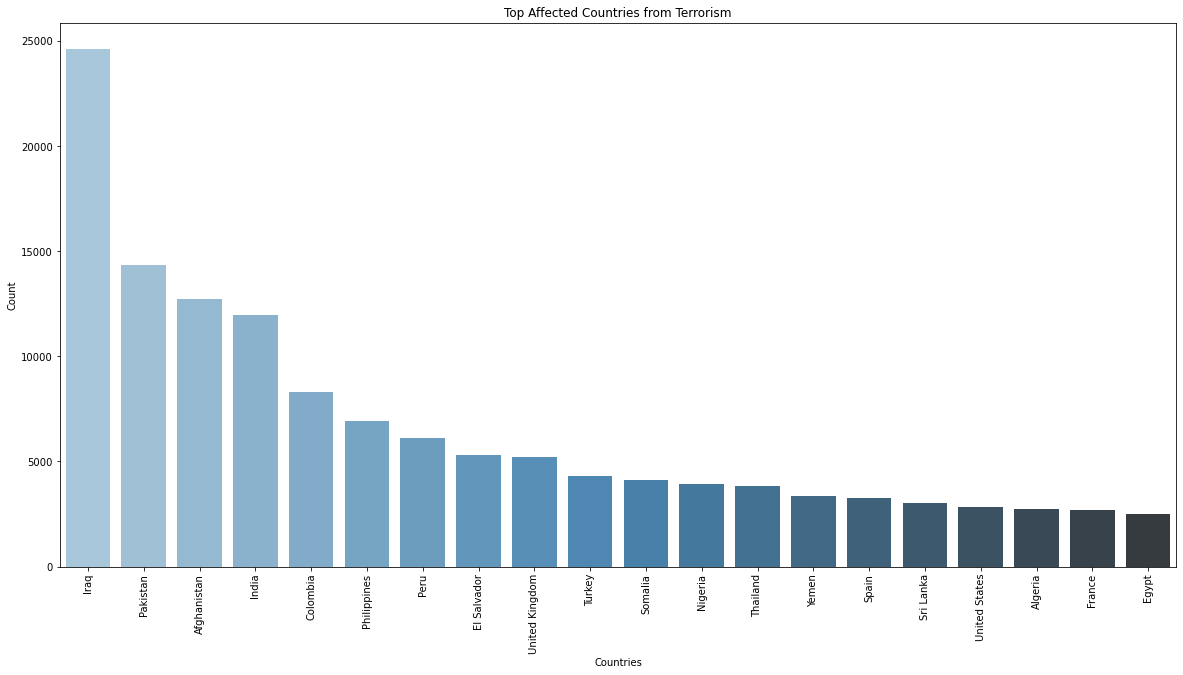

In [20]:
plt.subplots(figsize=(20,10))
sns.barplot(terrorism['Country'].value_counts()[:20].index,
            terrorism['Country'].value_counts()[:20].values,palette='Blues_d')
plt.title('Top Affected Countries from Terrorism')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

# Terrorist Attacks of a Particular year and their Locations

In [21]:
import folium
from folium.plugins import MarkerCluster

In [22]:
filterYear = terrorism['Year'] == 2001

In [23]:
filterData = terrorism[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] # get the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [24]:
map = folium.Map(location = [0, 50], tiles='CartoDB positron', zoom_start=2) 
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

From the above map, we can observed that the maximum attacks carried out in the year 2001 was on the African Continent, almost 1325 attacks. Then, the continent South America faced the highest number of attacks, i.e. 258.

# Terrorist's Origanizations Operations In Each Country

In [25]:
terrorism['Group'].value_counts()[1:20]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Tehrik-i-Taliban Pakistan (TTP)                     1351
Palestinians                                        1125
Houthi extremists (Ansar Allah)

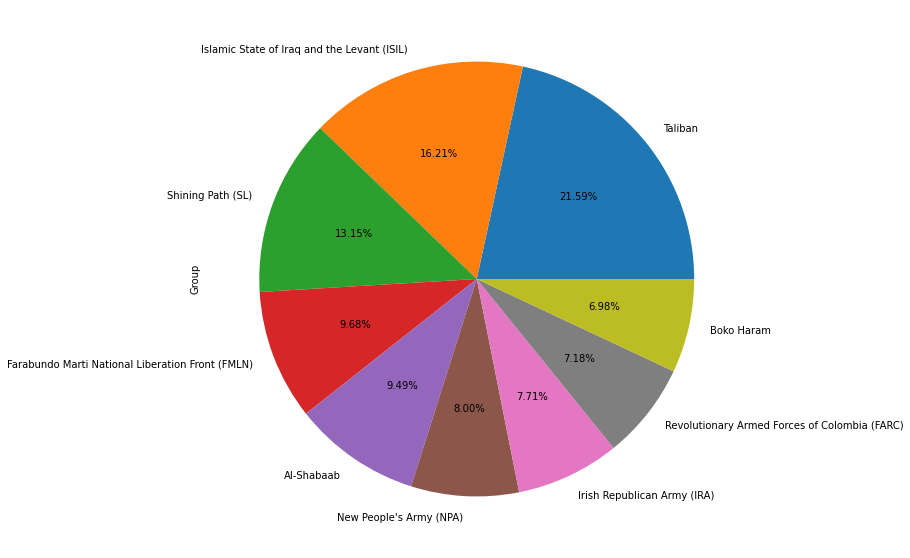

In [26]:
plt.figure(figsize=(16,10))
terrorism['Group'].value_counts()[1:10].plot.pie(autopct='%.2f%%')
plt.show()

In [27]:
test = terrorism[terrorism.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [28]:
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Syria', 'Iraq', 'Turkey', 'Tunisia',
       'Lebanon', 'Turkmenistan', 'Israel', 'Belgium', 'Egypt', 'Libya',
       'Saudi Arabia', 'West Bank and Gaza Strip', 'France', 'Bahrain',
       'Jordan', 'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

In [29]:
terrorism_df_group = terrorism.dropna(subset=['latitude','longitude'])

In [30]:
terrorism_df_group = terrorism_df_group.drop_duplicates(subset=['Country','Group'])

In [31]:
terrorist_groups = terrorism.Group.value_counts()[1:8].index.tolist()
terrorism_df_group = terrorism_df_group.loc[terrorism_df_group.Group.isin(terrorist_groups)]
print(terrorism_df_group.Group.unique())

["New People's Army (NPA)" 'Irish Republican Army (IRA)'
 'Shining Path (SL)' 'Farabundo Marti National Liberation Front (FMLN)'
 'Taliban' 'Al-Shabaab' 'Islamic State of Iraq and the Levant (ISIL)']


In [32]:
map = folium.Map(location=[50, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(terrorism_df_group)):
    folium.Marker([terrorism_df_group.iloc[i]['latitude'],terrorism_df_group.iloc[i]['longitude']], 
                  popup='Group:{}<br>Country:{}'.format(terrorism_df_group.iloc[i]['Group'], 
                  terrorism_df_group.iloc[i]['Country'])).add_to(map)
map

# Total Number of people killed in terror attack

In [33]:
killData = terrorism.loc[:,'Killed']
print('Number of people killed by terror attacks:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attacks: 411868


**Let's look at what types of attacks these deaths were made of**

In [34]:
attackData = terrorism.loc[:,'AttackType']
typeKillData = pd.concat([attackData, killData], axis=1)

In [35]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType  Armed Assault  Assassination  Bombing/Explosion  \
Killed           160297.0        24920.0           157321.0   

AttackType  Facility/Infrastructure Attack  Hijacking  \
Killed                              3642.0     3718.0   

AttackType  Hostage Taking (Barricade Incident)  Hostage Taking (Kidnapping)  \
Killed                                   4478.0                      24231.0   

AttackType  Unarmed Assault  Unknown  
Killed                880.0  32381.0

# Number of Killed in Terrorist Attacks by Countries

In [40]:
countryData = terrorism.loc[:,'Country']

# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [41]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country  Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  \
Killed       39384.0     42.0  11066.0      0.0  3043.0                  0.0   

Country  Argentina  Armenia  Australia  Austria  ...  Vietnam  \
Killed       490.0     37.0       23.0     30.0  ...      1.0   

Country  Wallis and Futuna  West Bank and Gaza Strip  West Germany (FRG)  \
Killed                 0.0                    1500.0                97.0   

Country  Western Sahara   Yemen  Yugoslavia  Zaire  Zambia  Zimbabwe  
Killed              1.0  8776.0       119.0  324.0    70.0     154.0  

[1 rows x 205 columns]

In [42]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

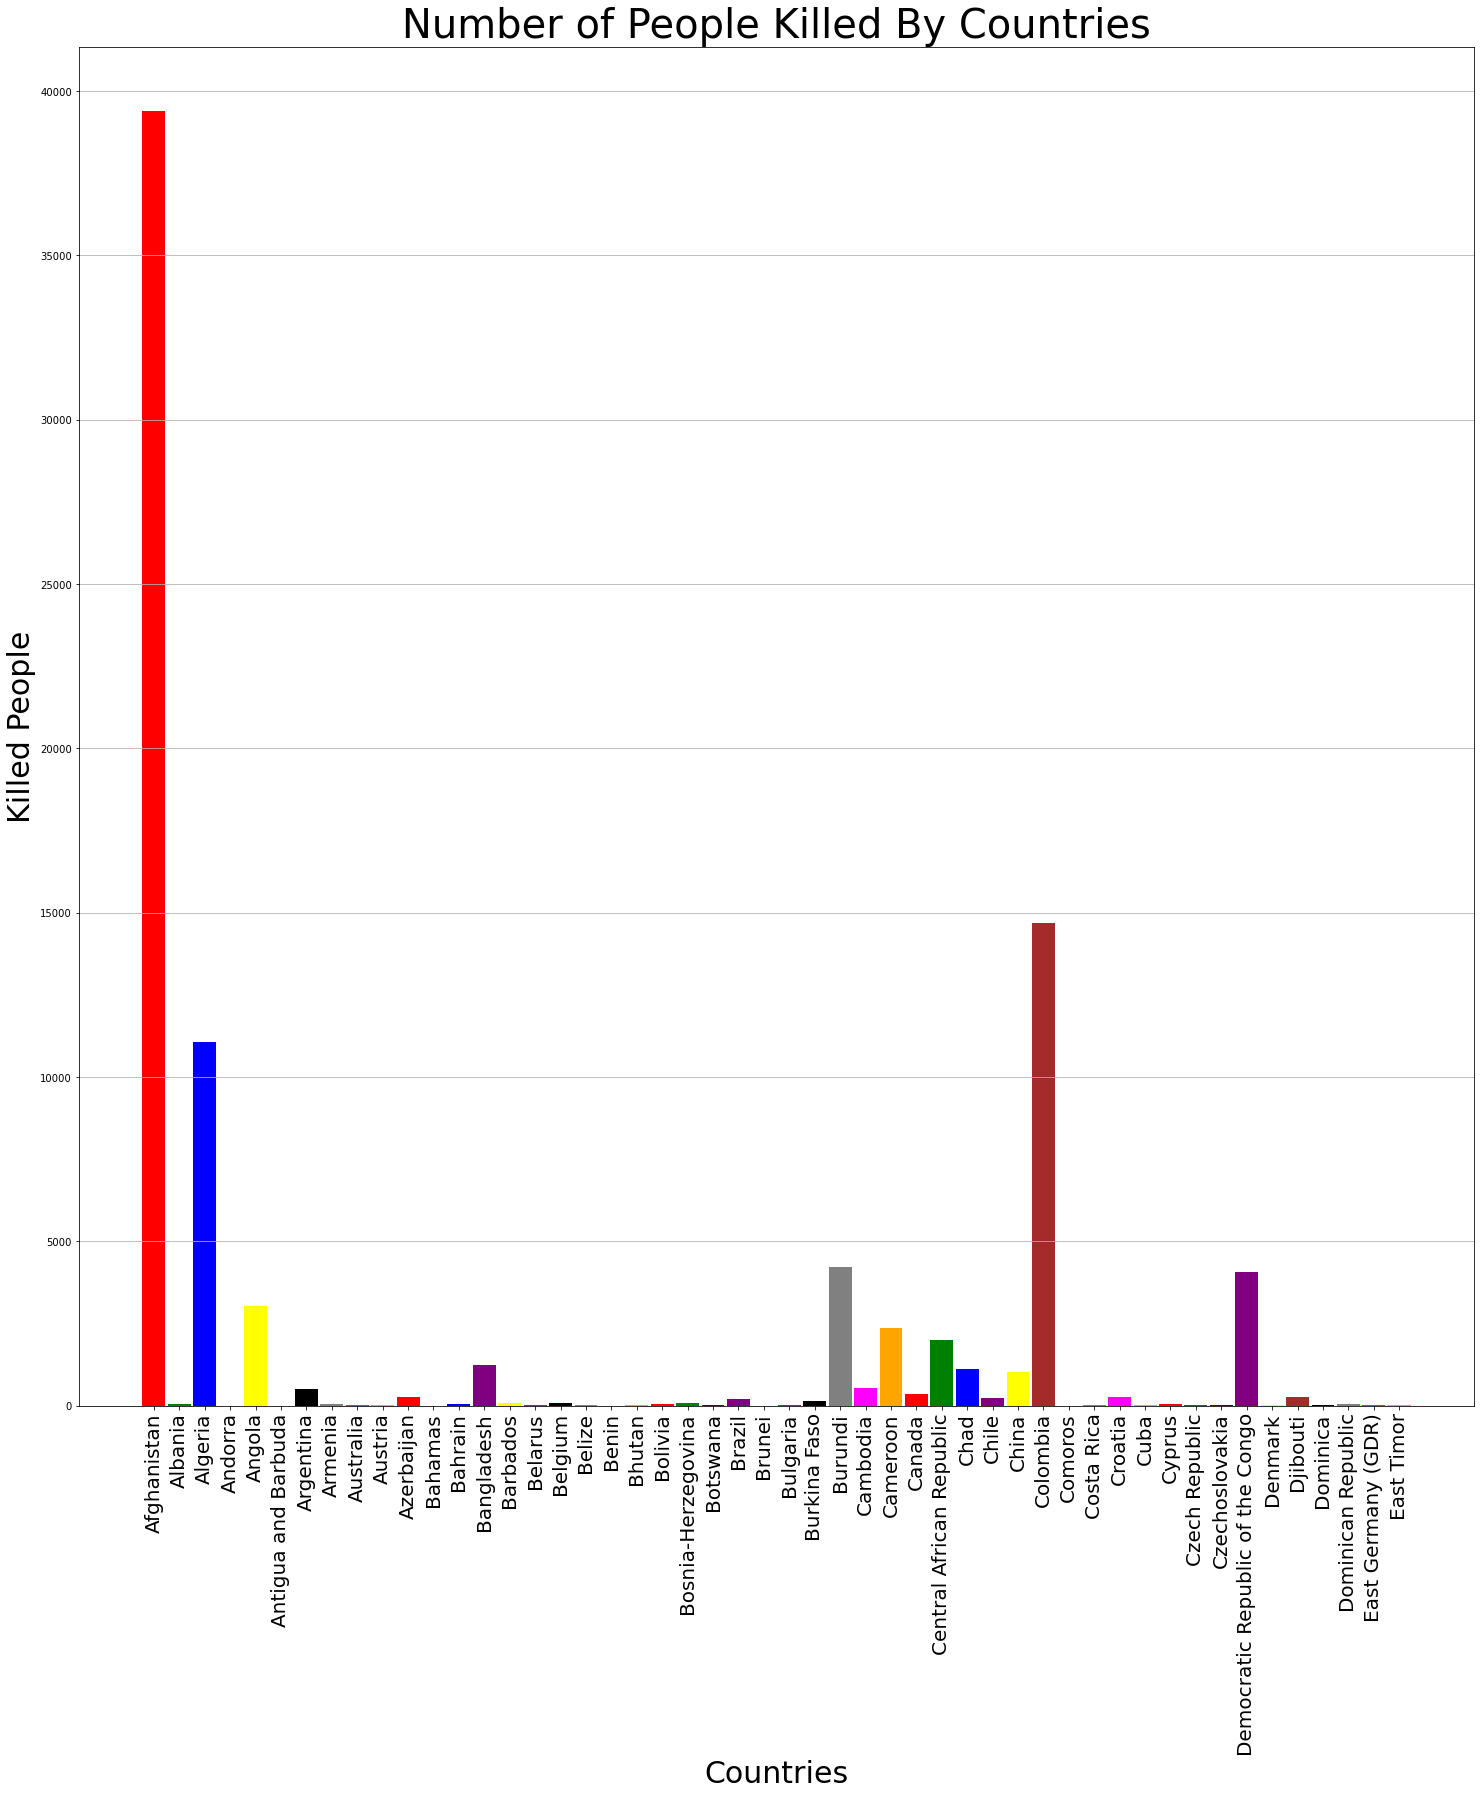

In [49]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red','green','blue','purple','yellow','brown','black','gray','magenta','orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=30)
plt.xlabel('Countries', fontsize = 30)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number of People Killed By Countries', fontsize = 40)
# print(fig_size)
plt.show()

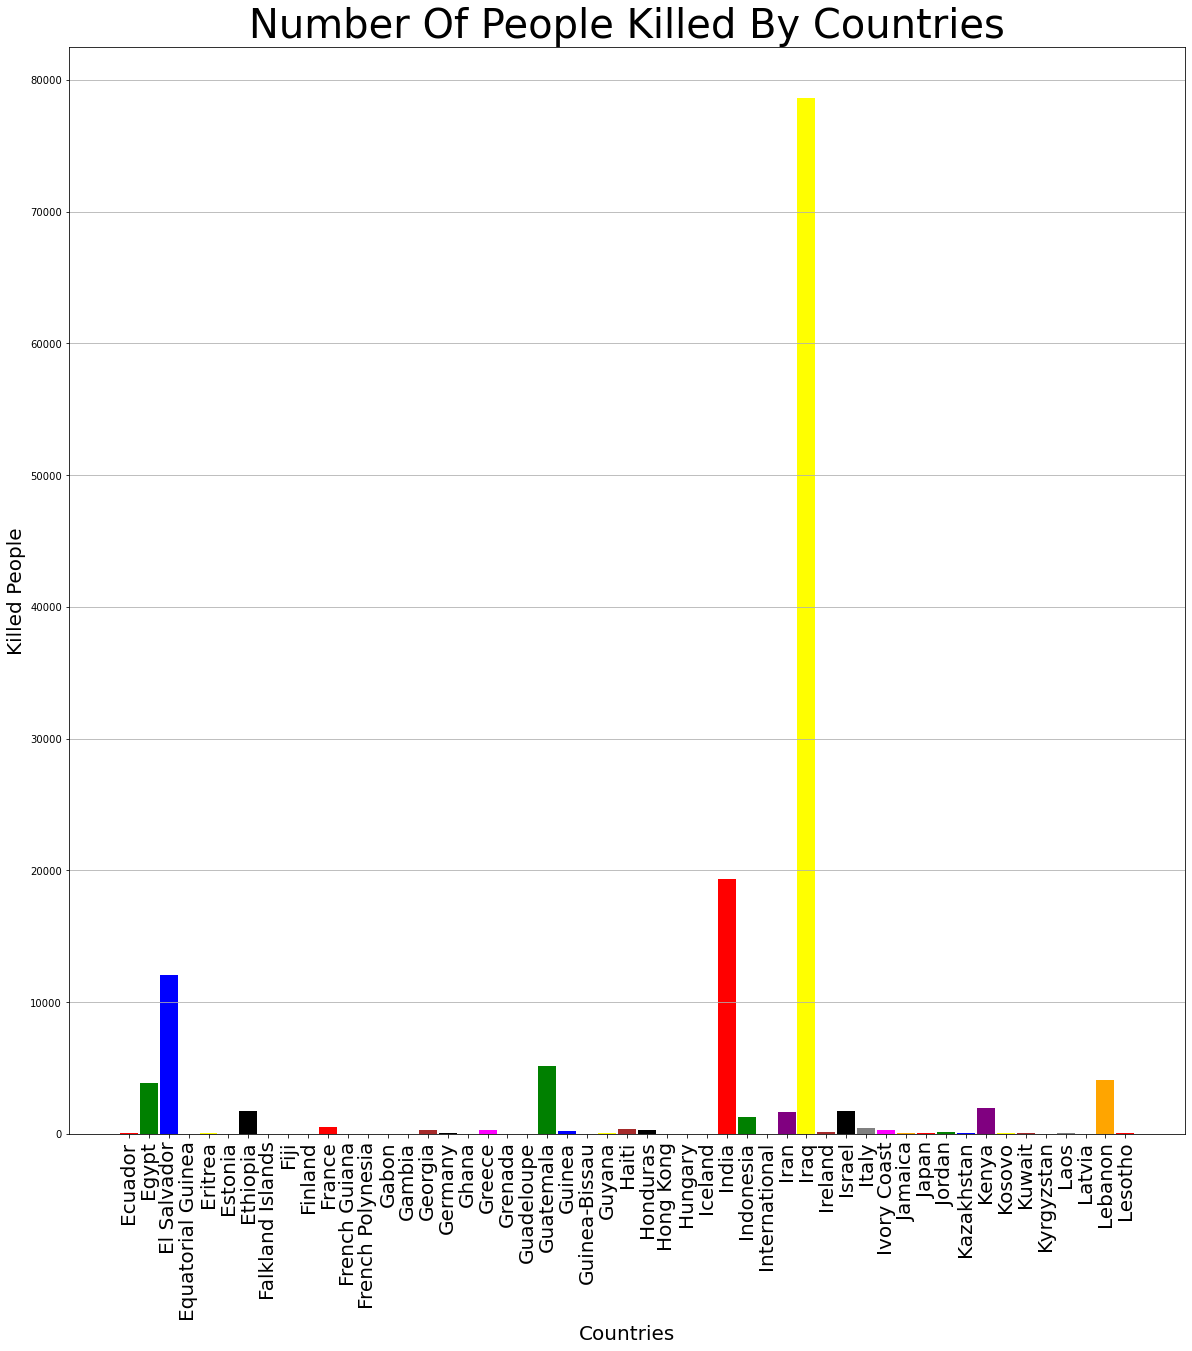

In [51]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red','green','blue','purple','yellow','brown','black','gray','magenta','orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number Of People Killed By Countries', fontsize = 40)
plt.show()

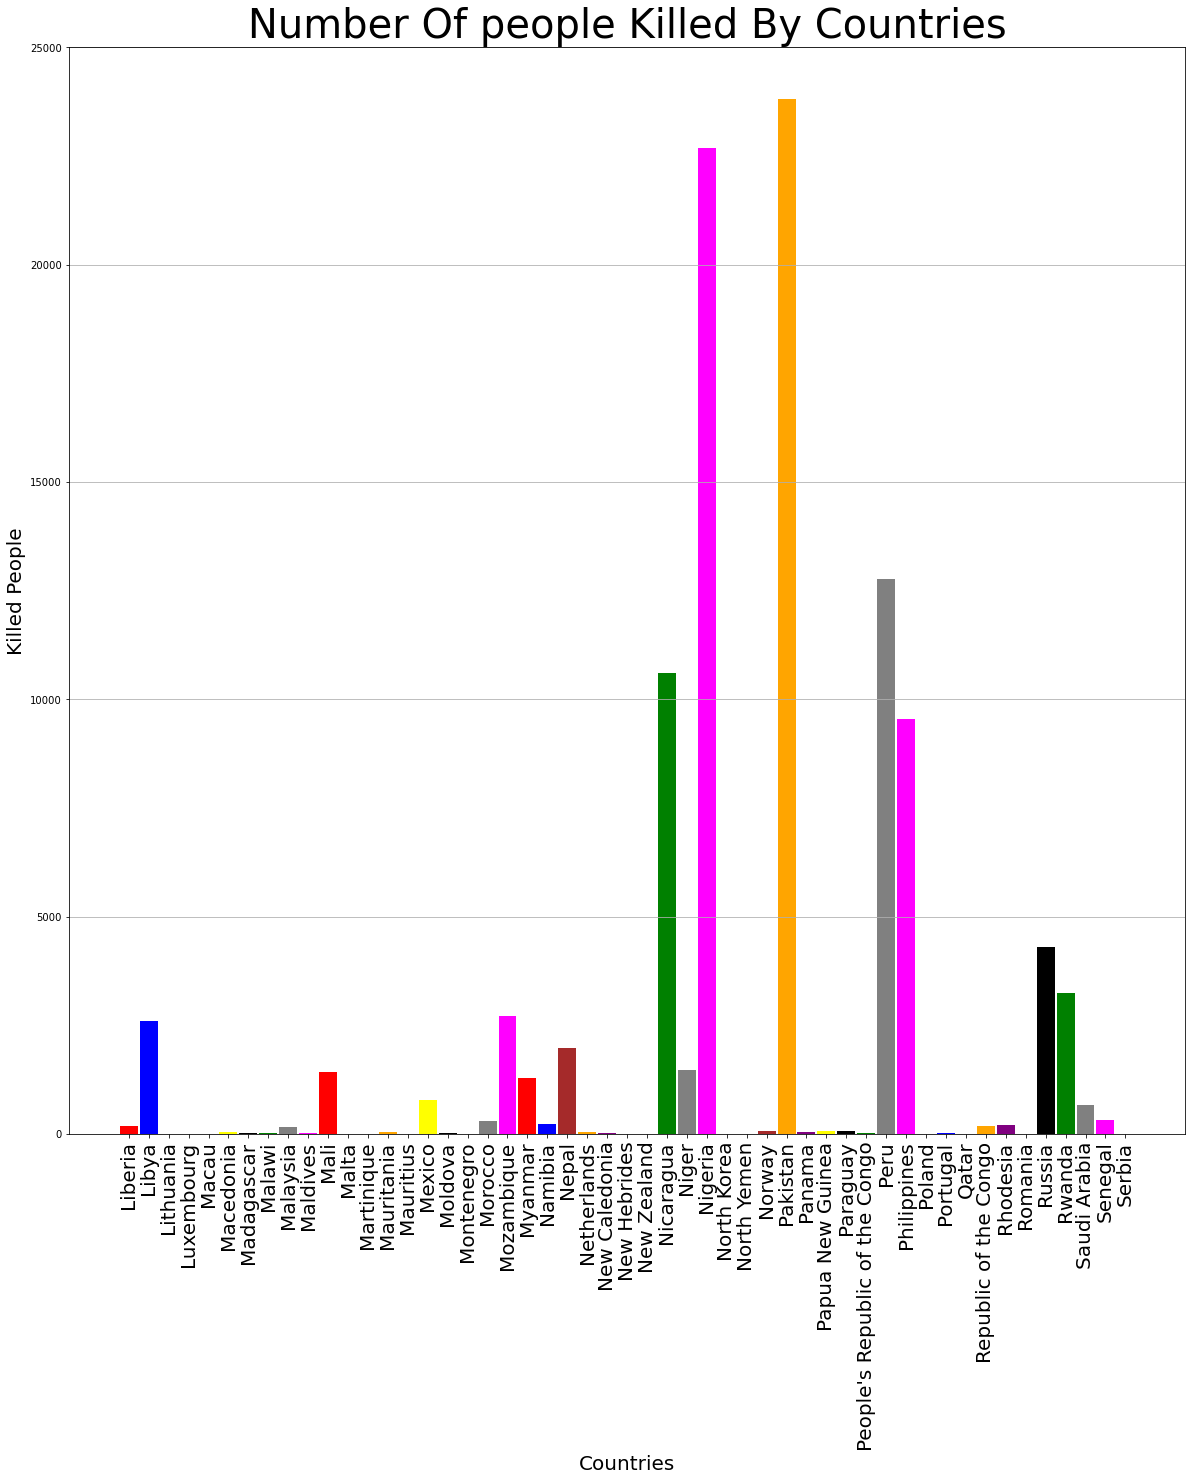

In [52]:
labels = countryKillFormatData.columns.tolist()
labels = labels[101:152]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[101:152]
values = [int(i[0]) for i in values]
colors = ['red', 'blue', 'brown', 'orange', 'purple', 'yellow', 'black', 'green', 'gray', 'magenta']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number Of people Killed By Countries', fontsize = 40)
plt.show()

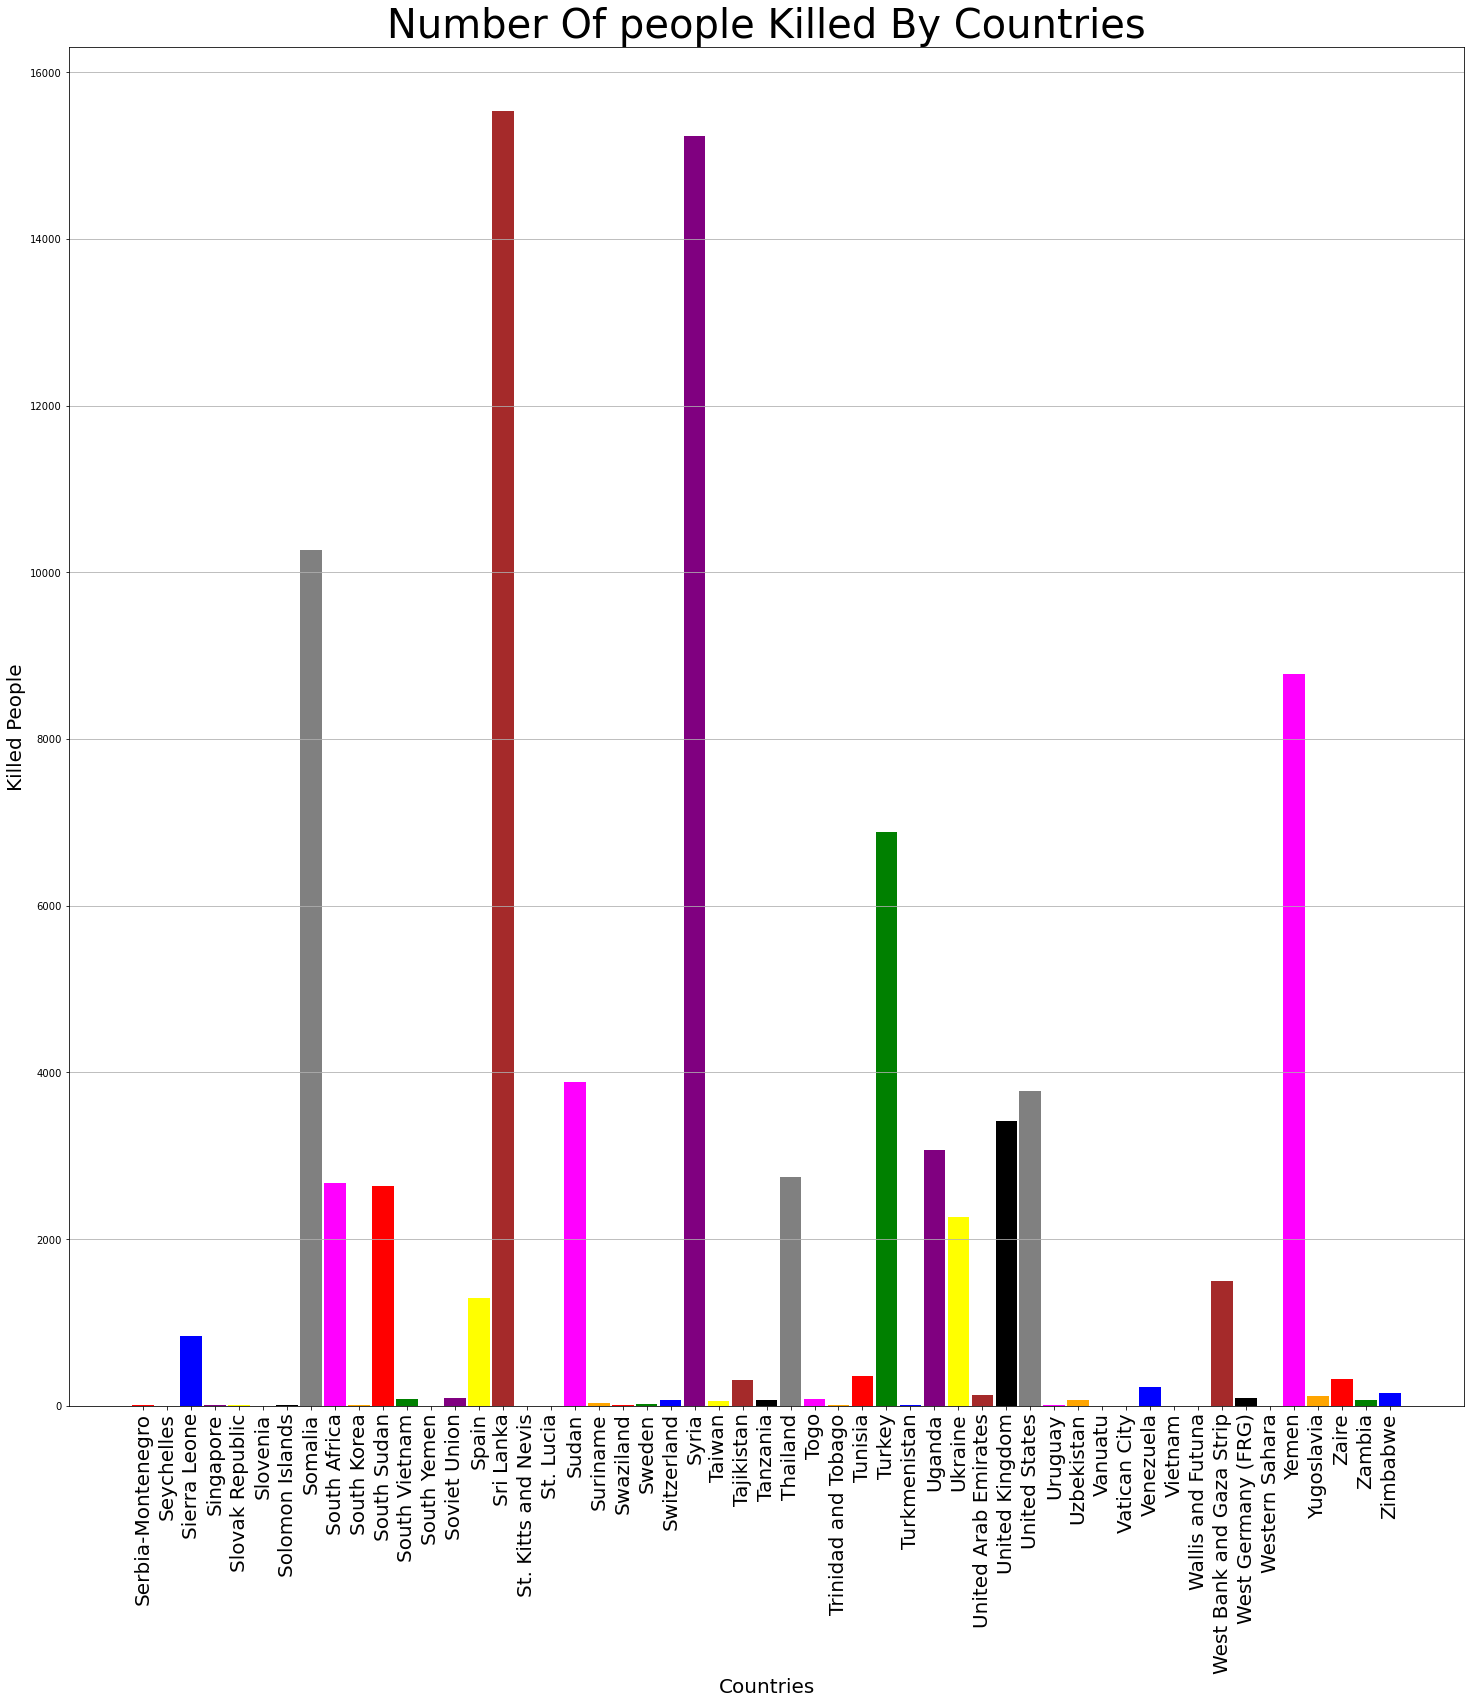

In [53]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number Of people Killed By Countries', fontsize = 40)
plt.show()

# CONCLUSIONS:

From the above plot, we can observe that the countries where most people are killed are : Afghanisthan, Columbia, Iran, Sri lanka, Syria, Somalia, Yemen naming a few. Even though there is a perception that Muslims are supporters of terrorism, but Muslims are the people who are most damaged by terrorist attacks.

One thing we are aslo observed that the overall terrorism is suddenly increased from 2010 and I have ranked the Hot zone in terms of terrorist activities in all regions.

Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries.